# Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import catboost as cb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams["figure.figsize"] = (16,6)

# Reading the Data

In [2]:
data = pd.read_csv("PUBG_Game_Prediction_data.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
data.shape

(4446966, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Wrangling

#### checking for the rows with missing values

In [5]:
#remove the row with null winprediction
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [6]:
data = data.drop(2744604)

In [7]:
# how many players are there in a match
data['playerJoined'] = data.groupby('matchId')['matchId'].transform('count')

In [8]:
data.head(15)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0.0000,0,0.00,0,0,34.70,1,0,0.0370,95
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0.0000,0,0.00,0,0,13.50,1,1497,0.0000,97
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368,96
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0.0000,0,0.00,0,0,799.90,4,0,0.3704,97
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0.0000,0,0.00,0,0,65.67,1,0,0.2143,97


In [9]:
data.shape

(4446965, 30)

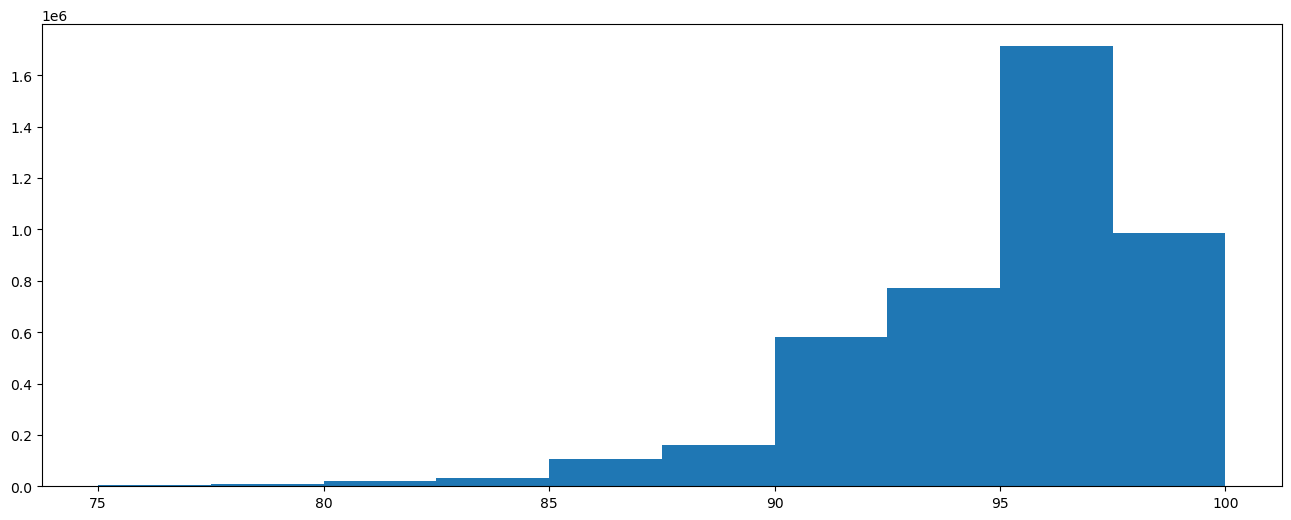

In [10]:
plt.hist(data[data['playerJoined'] >= 75]['playerJoined'])
plt.show()

### Analyzing the data 

In [11]:
data['totaldistance'] = data['swimDistance'] + data['walkDistance'] + data['rideDistance']
data['killswithoutmoving'] = ((data['kills'] > 0) & (data['totaldistance'] == 0))

In [12]:
data[data['killswithoutmoving'] == True].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,killswithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0.0,0,0,0.0,8,0,0.8000,44,0.0,True
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.0,0,0,0.0,8,0,0.6000,48,0.0,True
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0.0,0,0,0.0,8,0,0.8571,57,0.0,True
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,0.0,0,0,0.0,12,1500,0.2857,61,0.0,True
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0.0,0,0,0.0,4,0,0.8571,53,0.0,True


In [13]:
data = data.drop(data[data['killswithoutmoving'] == True].index)

In [14]:
data.shape

(4445430, 32)

### Extra_ordinary Road Kills

In [15]:
data = data.drop(data[data['roadKills'] > 5].index)

### So many Kills

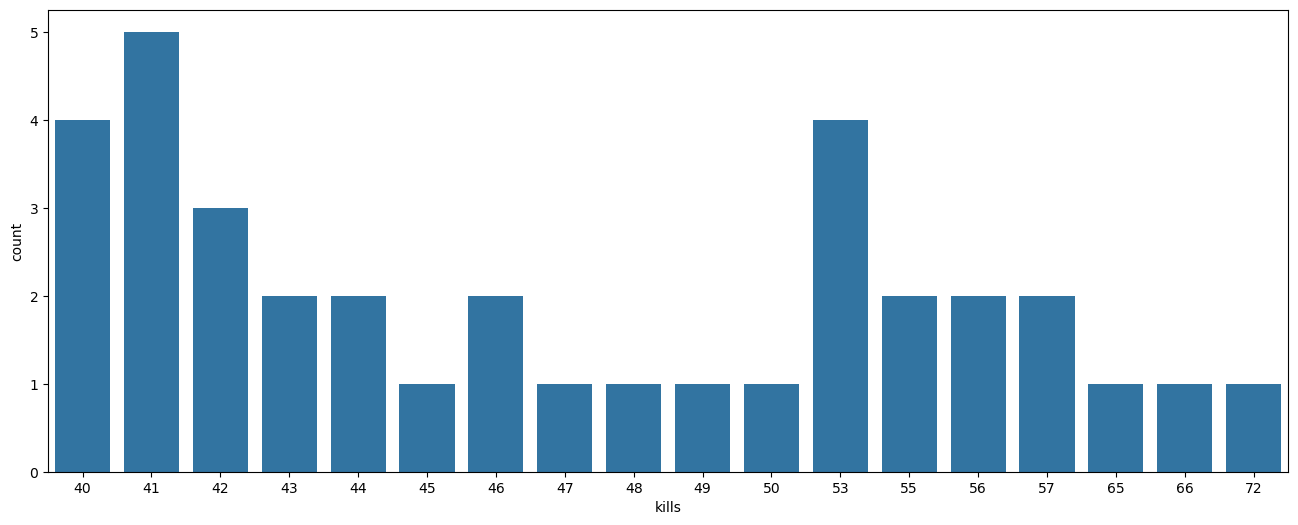

In [16]:
sns.countplot(x = data[data['kills'] >= 40]['kills'], data = data)
plt.show()

In [17]:
data = data.drop(data[data['kills'] > 20].index)

### Head Shots

In [18]:
data['headshotrate'] = data['headshotKills']/data['kills']
data['headshotrate'].fillna(0)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshotrate, Length: 4444967, dtype: float64

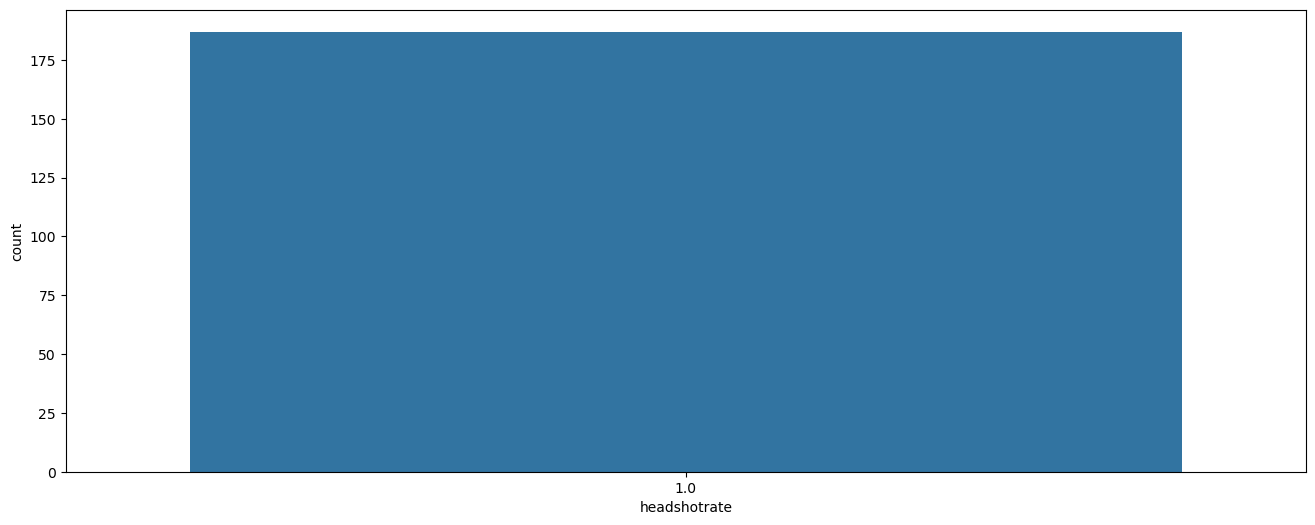

In [19]:
sns.countplot(x = data[(data['headshotrate'] == 1) & (data['kills'] > 5)]['headshotrate'], data = data)
plt.show()

In [20]:
data = data.drop(data[(data['headshotrate'] == 1) & (data['kills'] > 5)].index)

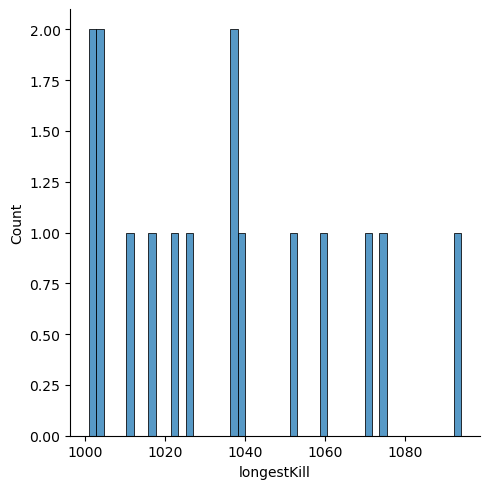

In [21]:
sns.displot(data[data['longestKill']>1000]['longestKill'], bins = 50)
plt.show()

In [22]:
data = data.drop(data[data['longestKill'] >= 1000].index)

### Weapon change

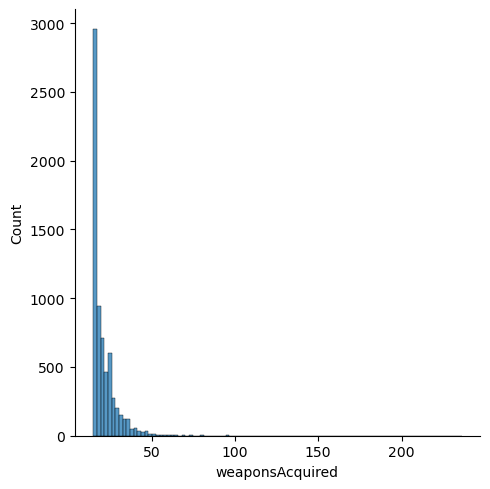

In [23]:
sns.displot(data[data['weaponsAcquired']>=15]['weaponsAcquired'], bins = 100)
plt.show()

In [24]:
data = data.drop(data[data['weaponsAcquired'] >= 15].index)

## EDA

In [25]:
new_data = data.drop(['Id', 'matchId', 'groupId', 'killswithoutmoving', 'matchType'], axis = 1)

In [26]:
new_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,headshotrate
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,NaN
1,0,0,91.47,0,0,0,57,0,0,0,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,NaN
2,1,0,68.00,0,0,0,47,0,0,0,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,NaN
3,0,0,32.90,0,0,0,75,0,0,0,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,NaN
4,0,0,100.00,0,0,0,45,0,1,1,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,0.0


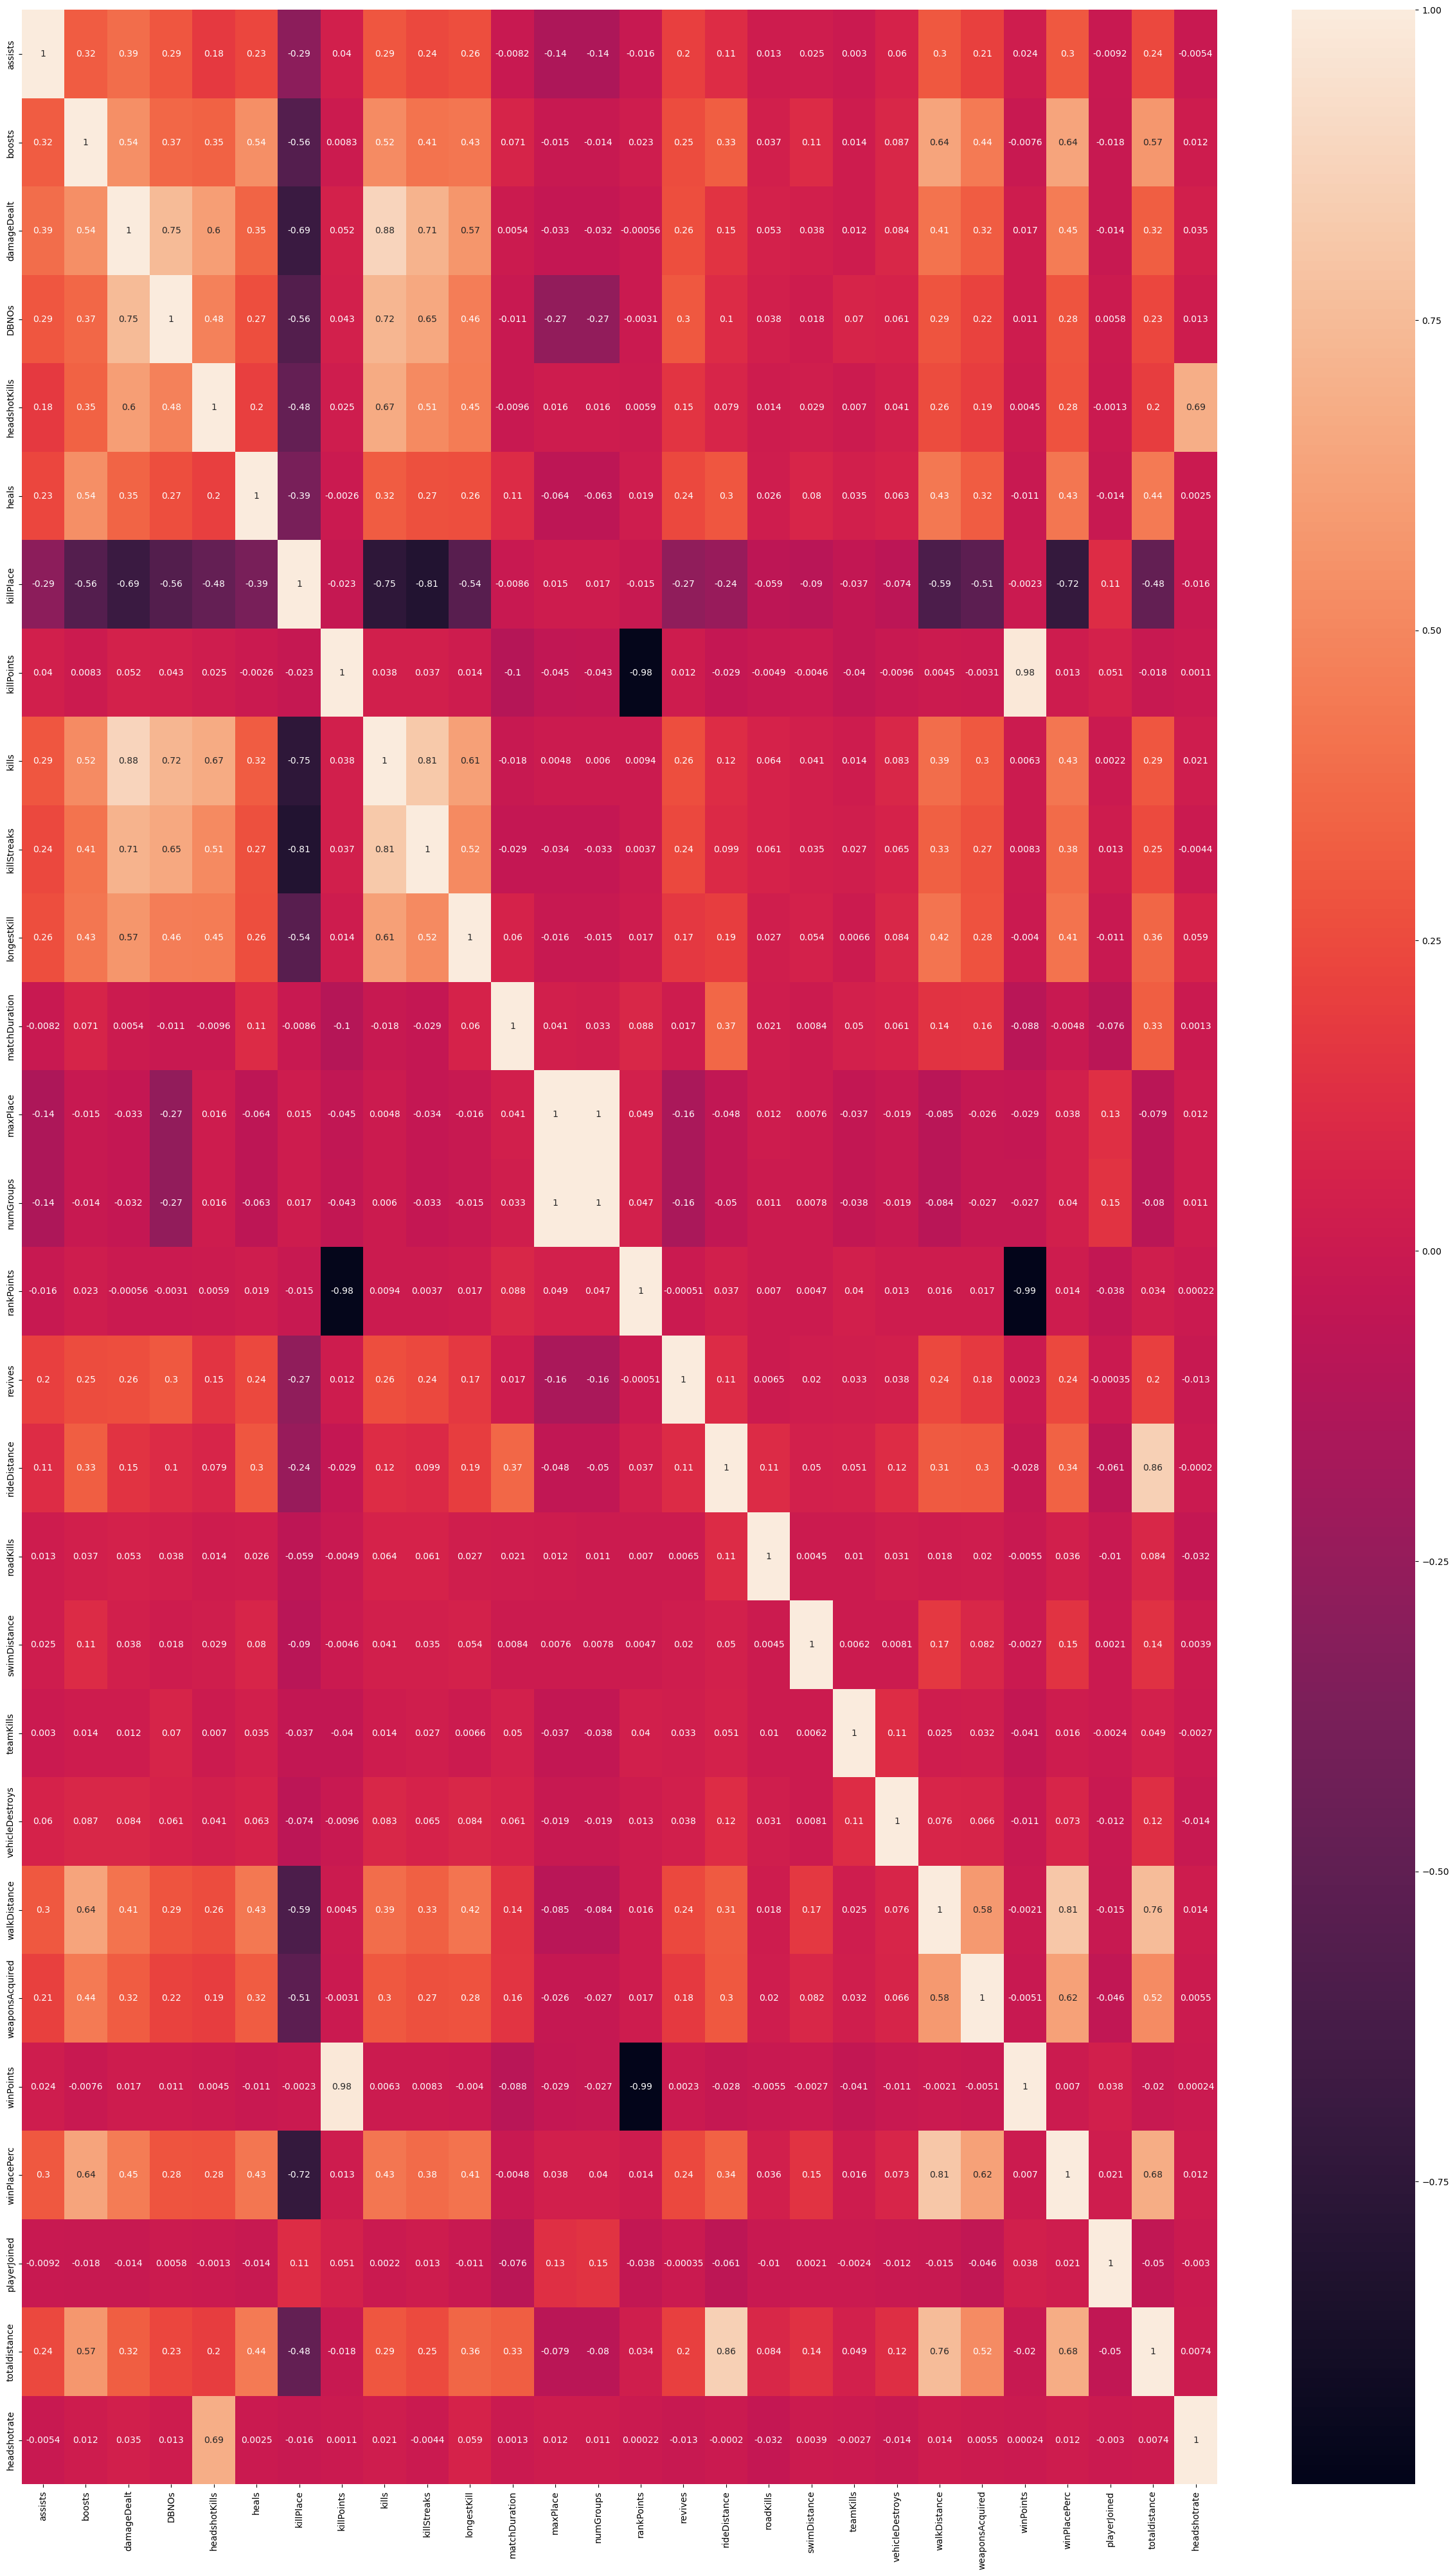

In [27]:
plt.figure(figsize=(30,50))
sns.heatmap(new_data.corr(), annot=True)
plt.show()

# Feature Enginnering 

In [28]:
# Normalizing factor because the match with 64 players and 100 will have different impacts
normalizing_factor = (100 - data['playerJoined'])/100 + 1

In [29]:
data['killsnorm'] = data['kills']*normalizing_factor
data['damageDealtnorm'] = data['damageDealt']*normalizing_factor
data['matchDurationnorm'] = data['matchDuration']*normalizing_factor
data['maxPlacenorm'] = data['maxPlace']*normalizing_factor

data['healsnboost'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [30]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerJoined',
       'totaldistance', 'killswithoutmoving', 'headshotrate', 'killsnorm',
       'damageDealtnorm', 'matchDurationnorm', 'maxPlacenorm', 'healsnboost',
       'assist'],
      dtype='object')

In [31]:
data = data.drop(['Id', 'groupId', 'matchId','assists', 'boosts','damageDealt','heals','kills','matchDuration','maxPlace',
                 'revives','rideDistance','swimDistance','walkDistance'], axis = 1)

In [32]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerJoined,totaldistance,killswithoutmoving,headshotrate,killsnorm,damageDealtnorm,matchDurationnorm,maxPlacenorm,healsnboost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,False,NaN,0.00,0.0000,1358.24,29.12,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,False,NaN,0.00,99.7023,1936.93,28.34,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,False,NaN,0.00,69.3600,1344.36,51.00,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,False,NaN,0.00,35.8610,1565.24,33.79,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,False,0.0,1.03,103.0000,1466.72,99.91,0,0


In [33]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerJoined,totaldistance,killswithoutmoving,headshotrate,killsnorm,damageDealtnorm,matchDurationnorm,maxPlacenorm,healsnboost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,False,NaN,0.00,0.0000,1358.24,29.12,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,False,NaN,0.00,99.7023,1936.93,28.34,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,False,NaN,0.00,69.3600,1344.36,51.00,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,False,NaN,0.00,35.8610,1565.24,33.79,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,False,0.0,1.03,103.0000,1466.72,99.91,0,0


# ML - CATBOOST MODEL

In [50]:
# Hadling match type and killswithout moving
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [51]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerJoined,totaldistance,killswithoutmoving,headshotrate,killsnorm,damageDealtnorm,matchDurationnorm,maxPlacenorm,healsnboost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,False,NaN,0.00,0.0000,1358.24,29.12,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,False,NaN,0.00,99.7023,1936.93,28.34,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,False,NaN,0.00,69.3600,1344.36,51.00,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,False,NaN,0.00,35.8610,1565.24,33.79,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,False,0.0,1.03,103.0000,1466.72,99.91,0,0


In [52]:
x = pd.get_dummies(x, columns=['matchType', 'killswithoutmoving'])
mapping = {False: 0, True: 1}
for col in x.select_dtypes(include=['bool']).columns:
    x[col] = x[col].map(mapping)

In [53]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutmoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
featuers = x.columns

In [38]:
x = x.fillna(x.mean())

AttributeError: 'numpy.ndarray' object has no attribute 'column'

In [39]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [40]:
x

array([[-0.58166299, -0.38281265,  0.44977614, ..., -0.40521452,
         1.23624173,  0.        ],
       [-0.58166299, -0.38281265,  0.34050971, ..., -0.40521452,
         1.23624173,  0.        ],
       [-0.58166299, -0.38281265, -0.02371173, ..., -0.40521452,
        -0.80890329,  0.        ],
       ...,
       [-0.58166299, -0.38281265,  0.66830901, ..., -0.40521452,
         1.23624173,  0.        ],
       [ 0.30661253,  1.32871054, -1.33490891, ..., -0.40521452,
         1.23624173,  0.        ],
       [-0.58166299, -0.38281265, -1.0799539 , ..., -0.40521452,
        -0.80890329,  0.        ]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=42)

In [43]:
train_data = cb.Pool(x_train, y_train)
test_data = cb.Pool(x_test, y_test)

In [44]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [45]:
grid = {
    'iterations': [100, 150],
    'learning_rate': [0.03, 0.1],
    'depth': [2,4,6,8]
}

In [46]:
model.grid_search(grid, train_data)

0:	learn: 0.5485433	test: 0.5482213	best: 0.5482213 (0)	total: 282ms	remaining: 27.9s
1:	learn: 0.5336641	test: 0.5333507	best: 0.5333507 (1)	total: 401ms	remaining: 19.7s
2:	learn: 0.5192914	test: 0.5189880	best: 0.5189880 (2)	total: 523ms	remaining: 16.9s
3:	learn: 0.5053866	test: 0.5050887	best: 0.5050887 (3)	total: 669ms	remaining: 16.1s
4:	learn: 0.4919502	test: 0.4916572	best: 0.4916572 (4)	total: 804ms	remaining: 15.3s
5:	learn: 0.4789221	test: 0.4786367	best: 0.4786367 (5)	total: 950ms	remaining: 14.9s
6:	learn: 0.4663153	test: 0.4660360	best: 0.4660360 (6)	total: 1.09s	remaining: 14.5s
7:	learn: 0.4541472	test: 0.4538769	best: 0.4538769 (7)	total: 1.23s	remaining: 14.1s
8:	learn: 0.4423192	test: 0.4420539	best: 0.4420539 (8)	total: 1.36s	remaining: 13.8s
9:	learn: 0.4309079	test: 0.4306463	best: 0.4306463 (9)	total: 1.48s	remaining: 13.3s
10:	learn: 0.4198474	test: 0.4195947	best: 0.4195947 (10)	total: 1.6s	remaining: 12.9s
11:	learn: 0.4092042	test: 0.4089576	best: 0.4089576 

94:	learn: 0.1398722	test: 0.1397672	best: 0.1397672 (94)	total: 12.4s	remaining: 654ms
95:	learn: 0.1394877	test: 0.1393826	best: 0.1393826 (95)	total: 12.5s	remaining: 522ms
96:	learn: 0.1391193	test: 0.1390151	best: 0.1390151 (96)	total: 12.7s	remaining: 391ms
97:	learn: 0.1387505	test: 0.1386475	best: 0.1386475 (97)	total: 12.8s	remaining: 261ms
98:	learn: 0.1383487	test: 0.1382460	best: 0.1382460 (98)	total: 12.9s	remaining: 130ms
99:	learn: 0.1380101	test: 0.1379073	best: 0.1379073 (99)	total: 13s	remaining: 0us

bestTest = 0.137907338
bestIteration = 99

0:	loss: 0.1379073	best: 0.1379073 (0)	total: 14.6s	remaining: 3m 39s
0:	learn: 0.5129254	test: 0.5126245	best: 0.5126245 (0)	total: 148ms	remaining: 14.7s
1:	learn: 0.4673099	test: 0.4670341	best: 0.4670341 (1)	total: 282ms	remaining: 13.8s
2:	learn: 0.4267422	test: 0.4264814	best: 0.4264814 (2)	total: 419ms	remaining: 13.5s
3:	learn: 0.3905873	test: 0.3903584	best: 0.3903584 (3)	total: 546ms	remaining: 13.1s
4:	learn: 0.358239

88:	learn: 0.1171520	test: 0.1170911	best: 0.1170911 (88)	total: 10.6s	remaining: 1.31s
89:	learn: 0.1168408	test: 0.1167798	best: 0.1167798 (89)	total: 10.7s	remaining: 1.19s
90:	learn: 0.1166432	test: 0.1165787	best: 0.1165787 (90)	total: 10.8s	remaining: 1.07s
91:	learn: 0.1165458	test: 0.1164845	best: 0.1164845 (91)	total: 10.9s	remaining: 951ms
92:	learn: 0.1164638	test: 0.1164022	best: 0.1164022 (92)	total: 11.1s	remaining: 832ms
93:	learn: 0.1163538	test: 0.1162914	best: 0.1162914 (93)	total: 11.2s	remaining: 712ms
94:	learn: 0.1162668	test: 0.1162043	best: 0.1162043 (94)	total: 11.3s	remaining: 593ms
95:	learn: 0.1161632	test: 0.1161015	best: 0.1161015 (95)	total: 11.4s	remaining: 475ms
96:	learn: 0.1157764	test: 0.1157154	best: 0.1157154 (96)	total: 11.5s	remaining: 356ms
97:	learn: 0.1156347	test: 0.1155715	best: 0.1155715 (97)	total: 11.7s	remaining: 238ms
98:	learn: 0.1155338	test: 0.1154697	best: 0.1154697 (98)	total: 11.8s	remaining: 119ms
99:	learn: 0.1154508	test: 0.115

82:	learn: 0.1461038	test: 0.1459982	best: 0.1459982 (82)	total: 10.1s	remaining: 8.12s
83:	learn: 0.1454819	test: 0.1453758	best: 0.1453758 (83)	total: 10.2s	remaining: 7.99s
84:	learn: 0.1449023	test: 0.1447970	best: 0.1447970 (84)	total: 10.3s	remaining: 7.87s
85:	learn: 0.1443424	test: 0.1442371	best: 0.1442371 (85)	total: 10.4s	remaining: 7.75s
86:	learn: 0.1437423	test: 0.1436364	best: 0.1436364 (86)	total: 10.5s	remaining: 7.63s
87:	learn: 0.1432187	test: 0.1431135	best: 0.1431135 (87)	total: 10.7s	remaining: 7.51s
88:	learn: 0.1427222	test: 0.1426168	best: 0.1426168 (88)	total: 10.8s	remaining: 7.38s
89:	learn: 0.1421889	test: 0.1420835	best: 0.1420835 (89)	total: 10.9s	remaining: 7.26s
90:	learn: 0.1417123	test: 0.1416058	best: 0.1416058 (90)	total: 11s	remaining: 7.14s
91:	learn: 0.1411692	test: 0.1410633	best: 0.1410633 (91)	total: 11.1s	remaining: 7.02s
92:	learn: 0.1407400	test: 0.1406348	best: 0.1406348 (92)	total: 11.2s	remaining: 6.89s
93:	learn: 0.1402725	test: 0.14016

24:	learn: 0.1441567	test: 0.1440654	best: 0.1440654 (24)	total: 3.04s	remaining: 15.2s
25:	learn: 0.1422285	test: 0.1421396	best: 0.1421396 (25)	total: 3.16s	remaining: 15.1s
26:	learn: 0.1407112	test: 0.1406202	best: 0.1406202 (26)	total: 3.28s	remaining: 15s
27:	learn: 0.1393321	test: 0.1392433	best: 0.1392433 (27)	total: 3.4s	remaining: 14.8s
28:	learn: 0.1379906	test: 0.1378999	best: 0.1378999 (28)	total: 3.52s	remaining: 14.7s
29:	learn: 0.1368881	test: 0.1367940	best: 0.1367940 (29)	total: 3.64s	remaining: 14.6s
30:	learn: 0.1358901	test: 0.1357924	best: 0.1357924 (30)	total: 3.75s	remaining: 14.4s
31:	learn: 0.1349814	test: 0.1348827	best: 0.1348827 (31)	total: 3.87s	remaining: 14.3s
32:	learn: 0.1342186	test: 0.1341264	best: 0.1341264 (32)	total: 3.99s	remaining: 14.1s
33:	learn: 0.1333680	test: 0.1332770	best: 0.1332770 (33)	total: 4.11s	remaining: 14s
34:	learn: 0.1326886	test: 0.1325981	best: 0.1325981 (34)	total: 4.23s	remaining: 13.9s
35:	learn: 0.1321174	test: 0.1320296	

118:	learn: 0.1133196	test: 0.1132628	best: 0.1132628 (118)	total: 13.9s	remaining: 3.63s
119:	learn: 0.1132640	test: 0.1132076	best: 0.1132076 (119)	total: 14.1s	remaining: 3.51s
120:	learn: 0.1132085	test: 0.1131524	best: 0.1131524 (120)	total: 14.2s	remaining: 3.4s
121:	learn: 0.1131080	test: 0.1130532	best: 0.1130532 (121)	total: 14.3s	remaining: 3.28s
122:	learn: 0.1130553	test: 0.1130009	best: 0.1130009 (122)	total: 14.4s	remaining: 3.16s
123:	learn: 0.1128391	test: 0.1127881	best: 0.1127881 (123)	total: 14.5s	remaining: 3.04s
124:	learn: 0.1127675	test: 0.1127182	best: 0.1127182 (124)	total: 14.6s	remaining: 2.93s
125:	learn: 0.1126994	test: 0.1126503	best: 0.1126503 (125)	total: 14.8s	remaining: 2.81s
126:	learn: 0.1123727	test: 0.1123191	best: 0.1123191 (126)	total: 14.9s	remaining: 2.69s
127:	learn: 0.1120890	test: 0.1120361	best: 0.1120361 (127)	total: 15s	remaining: 2.58s
128:	learn: 0.1119789	test: 0.1119271	best: 0.1119271 (128)	total: 15.1s	remaining: 2.46s
129:	learn: 0

60:	learn: 0.1534997	test: 0.1533986	best: 0.1533986 (60)	total: 11.3s	remaining: 7.2s
61:	learn: 0.1518293	test: 0.1517294	best: 0.1517294 (61)	total: 11.4s	remaining: 7.01s
62:	learn: 0.1502321	test: 0.1501320	best: 0.1501320 (62)	total: 11.6s	remaining: 6.82s
63:	learn: 0.1486628	test: 0.1485615	best: 0.1485615 (63)	total: 11.8s	remaining: 6.64s
64:	learn: 0.1472040	test: 0.1471025	best: 0.1471025 (64)	total: 12s	remaining: 6.44s
65:	learn: 0.1457624	test: 0.1456594	best: 0.1456594 (65)	total: 12.2s	remaining: 6.26s
66:	learn: 0.1444431	test: 0.1443415	best: 0.1443415 (66)	total: 12.3s	remaining: 6.07s
67:	learn: 0.1431290	test: 0.1430266	best: 0.1430266 (67)	total: 12.5s	remaining: 5.88s
68:	learn: 0.1418583	test: 0.1417564	best: 0.1417564 (68)	total: 12.7s	remaining: 5.69s
69:	learn: 0.1405454	test: 0.1404435	best: 0.1404435 (69)	total: 12.9s	remaining: 5.51s
70:	learn: 0.1394228	test: 0.1393207	best: 0.1393207 (70)	total: 13s	remaining: 5.32s
71:	learn: 0.1383550	test: 0.1382524	

53:	learn: 0.1058058	test: 0.1057267	best: 0.1057267 (53)	total: 9.51s	remaining: 8.1s
54:	learn: 0.1053062	test: 0.1052268	best: 0.1052268 (54)	total: 9.69s	remaining: 7.93s
55:	learn: 0.1047536	test: 0.1046701	best: 0.1046701 (55)	total: 9.87s	remaining: 7.75s
56:	learn: 0.1045715	test: 0.1044910	best: 0.1044910 (56)	total: 10s	remaining: 7.56s
57:	learn: 0.1043745	test: 0.1042939	best: 0.1042939 (57)	total: 10.2s	remaining: 7.36s
58:	learn: 0.1042025	test: 0.1041210	best: 0.1041210 (58)	total: 10.3s	remaining: 7.18s
59:	learn: 0.1039830	test: 0.1038992	best: 0.1038992 (59)	total: 10.5s	remaining: 6.99s
60:	learn: 0.1037964	test: 0.1037137	best: 0.1037137 (60)	total: 10.7s	remaining: 6.81s
61:	learn: 0.1036307	test: 0.1035503	best: 0.1035503 (61)	total: 10.8s	remaining: 6.62s
62:	learn: 0.1032224	test: 0.1031340	best: 0.1031340 (62)	total: 11s	remaining: 6.45s
63:	learn: 0.1028531	test: 0.1027638	best: 0.1027638 (63)	total: 11.1s	remaining: 6.27s
64:	learn: 0.1025401	test: 0.1024543	

46:	learn: 0.1863826	test: 0.1862672	best: 0.1862672 (46)	total: 8.85s	remaining: 19.4s
47:	learn: 0.1833903	test: 0.1832766	best: 0.1832766 (47)	total: 9.03s	remaining: 19.2s
48:	learn: 0.1804729	test: 0.1803606	best: 0.1803606 (48)	total: 9.23s	remaining: 19s
49:	learn: 0.1776063	test: 0.1774971	best: 0.1774971 (49)	total: 9.42s	remaining: 18.8s
50:	learn: 0.1749791	test: 0.1748711	best: 0.1748711 (50)	total: 9.59s	remaining: 18.6s
51:	learn: 0.1724190	test: 0.1723117	best: 0.1723117 (51)	total: 9.77s	remaining: 18.4s
52:	learn: 0.1699564	test: 0.1698506	best: 0.1698506 (52)	total: 9.98s	remaining: 18.3s
53:	learn: 0.1676037	test: 0.1675003	best: 0.1675003 (53)	total: 10.2s	remaining: 18.1s
54:	learn: 0.1653114	test: 0.1652081	best: 0.1652081 (54)	total: 10.3s	remaining: 17.9s
55:	learn: 0.1631007	test: 0.1629975	best: 0.1629975 (55)	total: 10.5s	remaining: 17.7s
56:	learn: 0.1610192	test: 0.1609147	best: 0.1609147 (56)	total: 10.7s	remaining: 17.5s
57:	learn: 0.1590345	test: 0.15893

139:	learn: 0.1107331	test: 0.1106407	best: 0.1106407 (139)	total: 24.9s	remaining: 1.78s
140:	learn: 0.1106265	test: 0.1105336	best: 0.1105336 (140)	total: 25.1s	remaining: 1.6s
141:	learn: 0.1105241	test: 0.1104321	best: 0.1104321 (141)	total: 25.3s	remaining: 1.42s
142:	learn: 0.1104184	test: 0.1103282	best: 0.1103282 (142)	total: 25.4s	remaining: 1.24s
143:	learn: 0.1103179	test: 0.1102280	best: 0.1102280 (143)	total: 25.5s	remaining: 1.06s
144:	learn: 0.1101989	test: 0.1101107	best: 0.1101107 (144)	total: 25.7s	remaining: 887ms
145:	learn: 0.1101063	test: 0.1100186	best: 0.1100186 (145)	total: 25.9s	remaining: 709ms
146:	learn: 0.1099321	test: 0.1098431	best: 0.1098431 (146)	total: 26.1s	remaining: 532ms
147:	learn: 0.1097289	test: 0.1096402	best: 0.1096402 (147)	total: 26.2s	remaining: 355ms
148:	learn: 0.1096286	test: 0.1095410	best: 0.1095410 (148)	total: 26.4s	remaining: 177ms
149:	learn: 0.1095359	test: 0.1094494	best: 0.1094494 (149)	total: 26.6s	remaining: 0us

bestTest = 0

82:	learn: 0.0987752	test: 0.0986867	best: 0.0986867 (82)	total: 14.6s	remaining: 11.8s
83:	learn: 0.0986753	test: 0.0985884	best: 0.0985884 (83)	total: 14.7s	remaining: 11.6s
84:	learn: 0.0985089	test: 0.0984235	best: 0.0984235 (84)	total: 14.9s	remaining: 11.4s
85:	learn: 0.0983799	test: 0.0982963	best: 0.0982963 (85)	total: 15.1s	remaining: 11.2s
86:	learn: 0.0981329	test: 0.0980464	best: 0.0980464 (86)	total: 15.3s	remaining: 11.1s
87:	learn: 0.0979693	test: 0.0978844	best: 0.0978844 (87)	total: 15.4s	remaining: 10.9s
88:	learn: 0.0979062	test: 0.0978223	best: 0.0978223 (88)	total: 15.6s	remaining: 10.7s
89:	learn: 0.0978209	test: 0.0977373	best: 0.0977373 (89)	total: 15.8s	remaining: 10.5s
90:	learn: 0.0975897	test: 0.0975039	best: 0.0975039 (90)	total: 15.9s	remaining: 10.3s
91:	learn: 0.0975073	test: 0.0974242	best: 0.0974242 (91)	total: 16.1s	remaining: 10.2s
92:	learn: 0.0973047	test: 0.0972201	best: 0.0972201 (92)	total: 16.3s	remaining: 9.99s
93:	learn: 0.0972419	test: 0.097

24:	learn: 0.2869501	test: 0.2868006	best: 0.2868006 (24)	total: 6.52s	remaining: 19.6s
25:	learn: 0.2799203	test: 0.2797765	best: 0.2797765 (25)	total: 6.78s	remaining: 19.3s
26:	learn: 0.2731618	test: 0.2730207	best: 0.2730207 (26)	total: 7.04s	remaining: 19s
27:	learn: 0.2666538	test: 0.2665178	best: 0.2665178 (27)	total: 7.28s	remaining: 18.7s
28:	learn: 0.2603569	test: 0.2602256	best: 0.2602256 (28)	total: 7.54s	remaining: 18.4s
29:	learn: 0.2542320	test: 0.2541059	best: 0.2541059 (29)	total: 7.83s	remaining: 18.3s
30:	learn: 0.2483488	test: 0.2482224	best: 0.2482224 (30)	total: 8.1s	remaining: 18s
31:	learn: 0.2426570	test: 0.2425343	best: 0.2425343 (31)	total: 8.37s	remaining: 17.8s
32:	learn: 0.2371976	test: 0.2370769	best: 0.2370769 (32)	total: 8.63s	remaining: 17.5s
33:	learn: 0.2319170	test: 0.2317989	best: 0.2317989 (33)	total: 8.92s	remaining: 17.3s
34:	learn: 0.2268198	test: 0.2267029	best: 0.2267029 (34)	total: 9.19s	remaining: 17.1s
35:	learn: 0.2219020	test: 0.2217907	

17:	learn: 0.1424979	test: 0.1423983	best: 0.1423983 (17)	total: 5.16s	remaining: 23.5s
18:	learn: 0.1370993	test: 0.1369998	best: 0.1369998 (18)	total: 5.42s	remaining: 23.1s
19:	learn: 0.1323878	test: 0.1322891	best: 0.1322891 (19)	total: 5.67s	remaining: 22.7s
20:	learn: 0.1279612	test: 0.1278599	best: 0.1278599 (20)	total: 5.96s	remaining: 22.4s
21:	learn: 0.1241769	test: 0.1240659	best: 0.1240659 (21)	total: 6.25s	remaining: 22.2s
22:	learn: 0.1212984	test: 0.1211843	best: 0.1211843 (22)	total: 6.51s	remaining: 21.8s
23:	learn: 0.1185476	test: 0.1184312	best: 0.1184312 (23)	total: 6.79s	remaining: 21.5s
24:	learn: 0.1161493	test: 0.1160334	best: 0.1160334 (24)	total: 7.04s	remaining: 21.1s
25:	learn: 0.1143096	test: 0.1141939	best: 0.1141939 (25)	total: 7.32s	remaining: 20.8s
26:	learn: 0.1122717	test: 0.1121575	best: 0.1121575 (26)	total: 7.59s	remaining: 20.5s
27:	learn: 0.1107887	test: 0.1106746	best: 0.1106746 (27)	total: 7.88s	remaining: 20.3s
28:	learn: 0.1092062	test: 0.109

10:	learn: 0.4142621	test: 0.4140514	best: 0.4140514 (10)	total: 2.87s	remaining: 36.3s
11:	learn: 0.4031482	test: 0.4029418	best: 0.4029418 (11)	total: 3.13s	remaining: 36s
12:	learn: 0.3923186	test: 0.3921191	best: 0.3921191 (12)	total: 3.41s	remaining: 35.9s
13:	learn: 0.3818716	test: 0.3816774	best: 0.3816774 (13)	total: 3.67s	remaining: 35.7s
14:	learn: 0.3717293	test: 0.3715414	best: 0.3715414 (14)	total: 3.94s	remaining: 35.5s
15:	learn: 0.3619674	test: 0.3617872	best: 0.3617872 (15)	total: 4.19s	remaining: 35.1s
16:	learn: 0.3524774	test: 0.3523025	best: 0.3523025 (16)	total: 4.45s	remaining: 34.8s
17:	learn: 0.3432771	test: 0.3431085	best: 0.3431085 (17)	total: 4.72s	remaining: 34.6s
18:	learn: 0.3343948	test: 0.3342282	best: 0.3342282 (18)	total: 4.98s	remaining: 34.3s
19:	learn: 0.3258110	test: 0.3256462	best: 0.3256462 (19)	total: 5.24s	remaining: 34.1s
20:	learn: 0.3175132	test: 0.3173500	best: 0.3173500 (20)	total: 5.5s	remaining: 33.8s
21:	learn: 0.3094941	test: 0.309333

104:	learn: 0.1076673	test: 0.1075651	best: 0.1075651 (104)	total: 26.2s	remaining: 11.2s
105:	learn: 0.1073356	test: 0.1072328	best: 0.1072328 (105)	total: 26.5s	remaining: 11s
106:	learn: 0.1069871	test: 0.1068847	best: 0.1068847 (106)	total: 26.7s	remaining: 10.7s
107:	learn: 0.1065493	test: 0.1064459	best: 0.1064459 (107)	total: 27s	remaining: 10.5s
108:	learn: 0.1062912	test: 0.1061887	best: 0.1061887 (108)	total: 27.3s	remaining: 10.3s
109:	learn: 0.1060037	test: 0.1058999	best: 0.1058999 (109)	total: 27.5s	remaining: 10s
110:	learn: 0.1057220	test: 0.1056181	best: 0.1056181 (110)	total: 27.8s	remaining: 9.76s
111:	learn: 0.1054995	test: 0.1053970	best: 0.1053970 (111)	total: 28s	remaining: 9.51s
112:	learn: 0.1052849	test: 0.1051840	best: 0.1051840 (112)	total: 28.3s	remaining: 9.25s
113:	learn: 0.1050105	test: 0.1049114	best: 0.1049114 (113)	total: 28.5s	remaining: 9s
114:	learn: 0.1047578	test: 0.1046576	best: 0.1046576 (114)	total: 28.8s	remaining: 8.75s
115:	learn: 0.1043836

46:	learn: 0.0971265	test: 0.0970162	best: 0.0970162 (46)	total: 11.8s	remaining: 25.8s
47:	learn: 0.0968598	test: 0.0967467	best: 0.0967467 (47)	total: 12s	remaining: 25.6s
48:	learn: 0.0966174	test: 0.0965076	best: 0.0965076 (48)	total: 12.3s	remaining: 25.3s
49:	learn: 0.0962663	test: 0.0961574	best: 0.0961574 (49)	total: 12.5s	remaining: 25s
50:	learn: 0.0960113	test: 0.0959064	best: 0.0959064 (50)	total: 12.7s	remaining: 24.7s
51:	learn: 0.0957925	test: 0.0956884	best: 0.0956884 (51)	total: 13s	remaining: 24.4s
52:	learn: 0.0956198	test: 0.0955168	best: 0.0955168 (52)	total: 13.2s	remaining: 24.1s
53:	learn: 0.0952436	test: 0.0951392	best: 0.0951392 (53)	total: 13.4s	remaining: 23.9s
54:	learn: 0.0950249	test: 0.0949182	best: 0.0949182 (54)	total: 13.7s	remaining: 23.7s
55:	learn: 0.0947805	test: 0.0946727	best: 0.0946727 (55)	total: 14s	remaining: 23.5s
56:	learn: 0.0944737	test: 0.0943684	best: 0.0943684 (56)	total: 14.2s	remaining: 23.2s
57:	learn: 0.0942317	test: 0.0941274	bes

139:	learn: 0.0851213	test: 0.0850223	best: 0.0850223 (139)	total: 34.1s	remaining: 2.43s
140:	learn: 0.0850739	test: 0.0849744	best: 0.0849744 (140)	total: 34.3s	remaining: 2.19s
141:	learn: 0.0850381	test: 0.0849376	best: 0.0849376 (141)	total: 34.5s	remaining: 1.95s
142:	learn: 0.0850075	test: 0.0849072	best: 0.0849072 (142)	total: 34.8s	remaining: 1.7s
143:	learn: 0.0849596	test: 0.0848608	best: 0.0848608 (143)	total: 35s	remaining: 1.46s
144:	learn: 0.0848815	test: 0.0847833	best: 0.0847833 (144)	total: 35.3s	remaining: 1.22s
145:	learn: 0.0848374	test: 0.0847408	best: 0.0847408 (145)	total: 35.5s	remaining: 973ms
146:	learn: 0.0848120	test: 0.0847149	best: 0.0847149 (146)	total: 35.7s	remaining: 729ms
147:	learn: 0.0847821	test: 0.0846854	best: 0.0846854 (147)	total: 36s	remaining: 486ms
148:	learn: 0.0847517	test: 0.0846553	best: 0.0846553 (148)	total: 36.2s	remaining: 243ms
149:	learn: 0.0846789	test: 0.0845821	best: 0.0845821 (149)	total: 36.5s	remaining: 0us

bestTest = 0.084

82:	learn: 0.1110016	test: 0.1109079	best: 0.1109079 (82)	total: 25s	remaining: 5.12s
83:	learn: 0.1103122	test: 0.1102195	best: 0.1102195 (83)	total: 25.3s	remaining: 4.82s
84:	learn: 0.1096155	test: 0.1095214	best: 0.1095214 (84)	total: 25.6s	remaining: 4.52s
85:	learn: 0.1089827	test: 0.1088898	best: 0.1088898 (85)	total: 25.9s	remaining: 4.21s
86:	learn: 0.1083575	test: 0.1082628	best: 0.1082628 (86)	total: 26.2s	remaining: 3.91s
87:	learn: 0.1077676	test: 0.1076722	best: 0.1076722 (87)	total: 26.5s	remaining: 3.61s
88:	learn: 0.1071548	test: 0.1070595	best: 0.1070595 (88)	total: 26.8s	remaining: 3.31s
89:	learn: 0.1066236	test: 0.1065287	best: 0.1065287 (89)	total: 27s	remaining: 3s
90:	learn: 0.1060162	test: 0.1059194	best: 0.1059194 (90)	total: 27.3s	remaining: 2.7s
91:	learn: 0.1054968	test: 0.1054001	best: 0.1054001 (91)	total: 27.6s	remaining: 2.4s
92:	learn: 0.1049940	test: 0.1048974	best: 0.1048974 (92)	total: 27.8s	remaining: 2.1s
93:	learn: 0.1045215	test: 0.1044246	best:

75:	learn: 0.0862155	test: 0.0861640	best: 0.0861640 (75)	total: 21.3s	remaining: 6.74s
76:	learn: 0.0860971	test: 0.0860430	best: 0.0860430 (76)	total: 21.6s	remaining: 6.46s
77:	learn: 0.0859649	test: 0.0859112	best: 0.0859112 (77)	total: 21.9s	remaining: 6.17s
78:	learn: 0.0859124	test: 0.0858575	best: 0.0858575 (78)	total: 22.2s	remaining: 5.89s
79:	learn: 0.0858432	test: 0.0857889	best: 0.0857889 (79)	total: 22.4s	remaining: 5.6s
80:	learn: 0.0857685	test: 0.0857145	best: 0.0857145 (80)	total: 22.7s	remaining: 5.32s
81:	learn: 0.0856144	test: 0.0855562	best: 0.0855562 (81)	total: 22.9s	remaining: 5.04s
82:	learn: 0.0855507	test: 0.0854934	best: 0.0854934 (82)	total: 23.2s	remaining: 4.75s
83:	learn: 0.0854040	test: 0.0853416	best: 0.0853416 (83)	total: 23.5s	remaining: 4.47s
84:	learn: 0.0853077	test: 0.0852457	best: 0.0852457 (84)	total: 23.8s	remaining: 4.19s
85:	learn: 0.0852209	test: 0.0851604	best: 0.0851604 (85)	total: 24s	remaining: 3.91s
86:	learn: 0.0851459	test: 0.085084

68:	learn: 0.1251421	test: 0.1250440	best: 0.1250440 (68)	total: 20.7s	remaining: 24.3s
69:	learn: 0.1238632	test: 0.1237663	best: 0.1237663 (69)	total: 21s	remaining: 24s
70:	learn: 0.1226488	test: 0.1225530	best: 0.1225530 (70)	total: 21.3s	remaining: 23.7s
71:	learn: 0.1214355	test: 0.1213394	best: 0.1213394 (71)	total: 21.6s	remaining: 23.4s
72:	learn: 0.1202194	test: 0.1201241	best: 0.1201241 (72)	total: 21.8s	remaining: 23s
73:	learn: 0.1191093	test: 0.1190131	best: 0.1190131 (73)	total: 22.1s	remaining: 22.7s
74:	learn: 0.1180039	test: 0.1179098	best: 0.1179098 (74)	total: 22.4s	remaining: 22.4s
75:	learn: 0.1170156	test: 0.1169219	best: 0.1169219 (75)	total: 22.7s	remaining: 22.1s
76:	learn: 0.1160174	test: 0.1159221	best: 0.1159221 (76)	total: 23s	remaining: 21.8s
77:	learn: 0.1151108	test: 0.1150154	best: 0.1150154 (77)	total: 23.3s	remaining: 21.5s
78:	learn: 0.1142582	test: 0.1141628	best: 0.1141628 (78)	total: 23.5s	remaining: 21.2s
79:	learn: 0.1134112	test: 0.1133164	bes

10:	learn: 0.2084156	test: 0.2083016	best: 0.2083016 (10)	total: 3.49s	remaining: 44.1s
11:	learn: 0.1935399	test: 0.1934342	best: 0.1934342 (11)	total: 3.82s	remaining: 43.9s
12:	learn: 0.1804741	test: 0.1803675	best: 0.1803675 (12)	total: 4.13s	remaining: 43.5s
13:	learn: 0.1688115	test: 0.1687141	best: 0.1687141 (13)	total: 4.45s	remaining: 43.2s
14:	learn: 0.1587420	test: 0.1586438	best: 0.1586438 (14)	total: 4.75s	remaining: 42.8s
15:	learn: 0.1500180	test: 0.1499224	best: 0.1499224 (15)	total: 5.08s	remaining: 42.6s
16:	learn: 0.1424073	test: 0.1423091	best: 0.1423091 (16)	total: 5.38s	remaining: 42.1s
17:	learn: 0.1359035	test: 0.1358037	best: 0.1358037 (17)	total: 5.69s	remaining: 41.8s
18:	learn: 0.1302188	test: 0.1301188	best: 0.1301188 (18)	total: 5.99s	remaining: 41.3s
19:	learn: 0.1251432	test: 0.1250456	best: 0.1250456 (19)	total: 6.3s	remaining: 41s
20:	learn: 0.1209430	test: 0.1208402	best: 0.1208402 (20)	total: 6.58s	remaining: 40.4s
21:	learn: 0.1172699	test: 0.117164

104:	learn: 0.0840332	test: 0.0839775	best: 0.0839775 (104)	total: 30s	remaining: 12.8s
105:	learn: 0.0839772	test: 0.0839214	best: 0.0839214 (105)	total: 30.3s	remaining: 12.6s
106:	learn: 0.0839037	test: 0.0838464	best: 0.0838464 (106)	total: 30.5s	remaining: 12.3s
107:	learn: 0.0838315	test: 0.0837727	best: 0.0837727 (107)	total: 30.8s	remaining: 12s
108:	learn: 0.0837999	test: 0.0837410	best: 0.0837410 (108)	total: 31s	remaining: 11.7s
109:	learn: 0.0837463	test: 0.0836882	best: 0.0836882 (109)	total: 31.3s	remaining: 11.4s
110:	learn: 0.0836846	test: 0.0836267	best: 0.0836267 (110)	total: 31.6s	remaining: 11.1s
111:	learn: 0.0836321	test: 0.0835759	best: 0.0835759 (111)	total: 31.8s	remaining: 10.8s
112:	learn: 0.0835780	test: 0.0835234	best: 0.0835234 (112)	total: 32.1s	remaining: 10.5s
113:	learn: 0.0835420	test: 0.0834895	best: 0.0834895 (113)	total: 32.4s	remaining: 10.2s
114:	learn: 0.0834730	test: 0.0834189	best: 0.0834189 (114)	total: 32.6s	remaining: 9.93s
115:	learn: 0.08

45:	learn: 0.0914986	test: 0.0915651	best: 0.0915651 (45)	total: 11.3s	remaining: 25.4s
46:	learn: 0.0912589	test: 0.0913240	best: 0.0913240 (46)	total: 11.5s	remaining: 25.2s
47:	learn: 0.0909219	test: 0.0909907	best: 0.0909907 (47)	total: 11.7s	remaining: 24.9s
48:	learn: 0.0906742	test: 0.0907458	best: 0.0907458 (48)	total: 11.9s	remaining: 24.6s
49:	learn: 0.0904424	test: 0.0905116	best: 0.0905116 (49)	total: 12.2s	remaining: 24.3s
50:	learn: 0.0901500	test: 0.0902264	best: 0.0902264 (50)	total: 12.4s	remaining: 24s
51:	learn: 0.0899528	test: 0.0900284	best: 0.0900284 (51)	total: 12.6s	remaining: 23.7s
52:	learn: 0.0897629	test: 0.0898377	best: 0.0898377 (52)	total: 12.8s	remaining: 23.5s
53:	learn: 0.0895578	test: 0.0896344	best: 0.0896344 (53)	total: 13.1s	remaining: 23.3s
54:	learn: 0.0893799	test: 0.0894570	best: 0.0894570 (54)	total: 13.3s	remaining: 23s
55:	learn: 0.0890841	test: 0.0891635	best: 0.0891635 (55)	total: 13.5s	remaining: 22.7s
56:	learn: 0.0889063	test: 0.0889852

138:	learn: 0.0824801	test: 0.0826405	best: 0.0826405 (138)	total: 32.3s	remaining: 2.56s
139:	learn: 0.0824578	test: 0.0826181	best: 0.0826181 (139)	total: 32.5s	remaining: 2.32s
140:	learn: 0.0824289	test: 0.0825893	best: 0.0825893 (140)	total: 32.7s	remaining: 2.09s
141:	learn: 0.0823998	test: 0.0825613	best: 0.0825613 (141)	total: 33s	remaining: 1.86s
142:	learn: 0.0823787	test: 0.0825409	best: 0.0825409 (142)	total: 33.2s	remaining: 1.62s
143:	learn: 0.0823433	test: 0.0825050	best: 0.0825050 (143)	total: 33.4s	remaining: 1.39s
144:	learn: 0.0823041	test: 0.0824700	best: 0.0824700 (144)	total: 33.7s	remaining: 1.16s
145:	learn: 0.0822592	test: 0.0824259	best: 0.0824259 (145)	total: 33.9s	remaining: 929ms
146:	learn: 0.0822241	test: 0.0823903	best: 0.0823903 (146)	total: 34.2s	remaining: 698ms
147:	learn: 0.0822020	test: 0.0823681	best: 0.0823681 (147)	total: 34.4s	remaining: 465ms
148:	learn: 0.0821815	test: 0.0823483	best: 0.0823483 (148)	total: 34.7s	remaining: 233ms
149:	learn: 

81:	learn: 0.0855243	test: 0.0856552	best: 0.0856552 (81)	total: 19.2s	remaining: 15.9s
82:	learn: 0.0854055	test: 0.0855389	best: 0.0855389 (82)	total: 19.4s	remaining: 15.7s
83:	learn: 0.0852986	test: 0.0854333	best: 0.0854333 (83)	total: 19.7s	remaining: 15.4s
84:	learn: 0.0851859	test: 0.0853162	best: 0.0853162 (84)	total: 19.8s	remaining: 15.2s
85:	learn: 0.0851398	test: 0.0852720	best: 0.0852720 (85)	total: 20s	remaining: 14.9s
86:	learn: 0.0850610	test: 0.0851963	best: 0.0851963 (86)	total: 20.3s	remaining: 14.7s
87:	learn: 0.0849882	test: 0.0851254	best: 0.0851254 (87)	total: 20.5s	remaining: 14.5s
88:	learn: 0.0849144	test: 0.0850528	best: 0.0850528 (88)	total: 20.8s	remaining: 14.2s
89:	learn: 0.0848455	test: 0.0849850	best: 0.0849850 (89)	total: 21s	remaining: 14s
90:	learn: 0.0847786	test: 0.0849162	best: 0.0849162 (90)	total: 21.3s	remaining: 13.8s
91:	learn: 0.0846809	test: 0.0848242	best: 0.0848242 (91)	total: 21.5s	remaining: 13.5s
92:	learn: 0.0846255	test: 0.0847706	b

23:	learn: 0.1115648	test: 0.1115264	best: 0.1115264 (23)	total: 5.95s	remaining: 31.2s
24:	learn: 0.1089562	test: 0.1089126	best: 0.1089126 (24)	total: 6.2s	remaining: 31s
25:	learn: 0.1068762	test: 0.1068268	best: 0.1068268 (25)	total: 6.46s	remaining: 30.8s
26:	learn: 0.1050713	test: 0.1050245	best: 0.1050245 (26)	total: 6.7s	remaining: 30.5s
27:	learn: 0.1035536	test: 0.1035047	best: 0.1035047 (27)	total: 6.94s	remaining: 30.2s
28:	learn: 0.1020157	test: 0.1019668	best: 0.1019668 (28)	total: 7.16s	remaining: 29.9s
29:	learn: 0.1007851	test: 0.1007330	best: 0.1007330 (29)	total: 7.4s	remaining: 29.6s
30:	learn: 0.0997774	test: 0.0997221	best: 0.0997221 (30)	total: 7.63s	remaining: 29.3s
31:	learn: 0.0989602	test: 0.0989099	best: 0.0989099 (31)	total: 7.86s	remaining: 29s
32:	learn: 0.0981532	test: 0.0981047	best: 0.0981047 (32)	total: 8.09s	remaining: 28.7s
33:	learn: 0.0974301	test: 0.0973783	best: 0.0973783 (33)	total: 8.33s	remaining: 28.4s
34:	learn: 0.0965538	test: 0.0965049	be

117:	learn: 0.0834345	test: 0.0834636	best: 0.0834636 (117)	total: 27.7s	remaining: 7.51s
118:	learn: 0.0833770	test: 0.0834085	best: 0.0834085 (118)	total: 27.9s	remaining: 7.28s
119:	learn: 0.0833452	test: 0.0833782	best: 0.0833782 (119)	total: 28.1s	remaining: 7.03s
120:	learn: 0.0833166	test: 0.0833500	best: 0.0833500 (120)	total: 28.4s	remaining: 6.8s
121:	learn: 0.0832593	test: 0.0832936	best: 0.0832936 (121)	total: 28.6s	remaining: 6.56s
122:	learn: 0.0832112	test: 0.0832432	best: 0.0832432 (122)	total: 28.8s	remaining: 6.32s
123:	learn: 0.0831619	test: 0.0831956	best: 0.0831956 (123)	total: 29s	remaining: 6.09s
124:	learn: 0.0831147	test: 0.0831491	best: 0.0831491 (124)	total: 29.2s	remaining: 5.85s
125:	learn: 0.0830680	test: 0.0831059	best: 0.0831059 (125)	total: 29.4s	remaining: 5.61s
126:	learn: 0.0830367	test: 0.0830751	best: 0.0830751 (126)	total: 29.6s	remaining: 5.37s
127:	learn: 0.0830060	test: 0.0830475	best: 0.0830475 (127)	total: 29.8s	remaining: 5.13s
128:	learn: 0

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [55]:
feature_imp = pd.DataFrame()
feature_imp['features'] = featuers
feature_imp['importance'] = model.feature_importances_
feature_imp = feature_imp.sort_values(by = ['importance'], ascending=False)

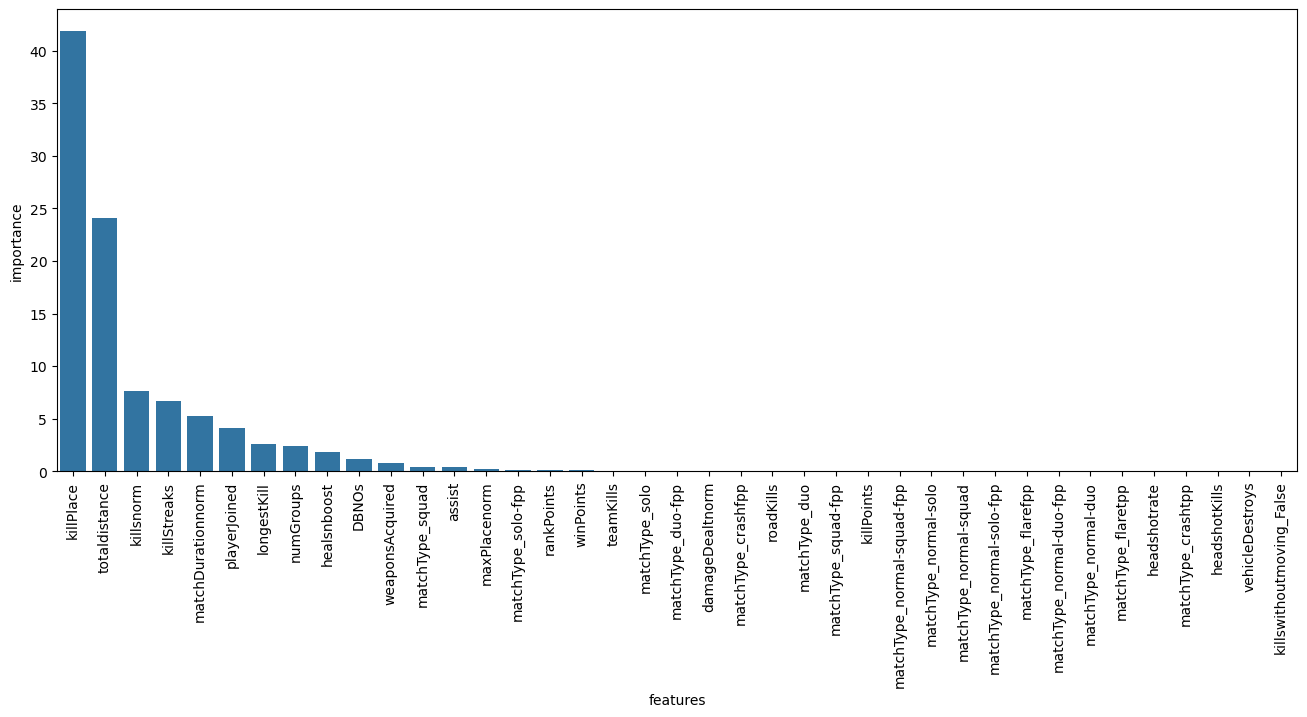

In [56]:
sns.barplot(x = feature_imp['features'], y = feature_imp['importance'])
plt.xticks(rotation = 90)
plt.show()

# Prediction

In [57]:
pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
r2

0.9284115065644296

In [58]:
rmse

0.08219145350090089

## 